In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, f1_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB 
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn import svm
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, TunedThresholdClassifierCV, FixedThresholdClassifier
from sklearn.model_selection import validation_curve


In [2]:
pd.set_option('display.max_columns', None)  # Отображать все колонки


In [3]:
path_train = 'train.csv' # содержит только имя файла, без имен папок !!!
df = pd.read_csv(path_train)

In [4]:
df = df.dropna()
df = df.drop_duplicates()

In [5]:
df['qual'] = np.where(df['quality'] >= 7, 1, 0)
df = df.drop('quality', axis=1)
df.rename(columns={'qual': 'quality'}, inplace=True)

In [6]:
X = df.drop('quality', axis=1)
y = df['quality']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [8]:
# pipe = Pipeline([
#     ('preprocessing', MinMaxScaler()), 
#     ('clf', LogisticRegression())
# ])

# cv = StratifiedShuffleSplit(test_size=0.3, train_size=0.7, n_splits=4, random_state=42)
# # score = make_scorer(precision_score, pos_label=1)

# scaling = [MinMaxScaler(), StandardScaler(), RobustScaler()]

# param_grid = [
#     {'preprocessing': scaling,
#      'clf__penalty': ['l2', 'l1'], 
#      'clf__solver': ['saga', 'liblinear'],
#      'clf__class_weight': ['balanced'],
#      'clf__max_iter': [6000],
#      'clf__random_state': [42]},

#     {'preprocessing': scaling,
#      'clf__penalty': ['l2', None],  
#      'clf__solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'],
#      'clf__class_weight': ['balanced'],
#      'clf__max_iter': [6000],
#      'clf__random_state': [42]}
# ]

# grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, scoring='roc_auc')#score)
# grid.fit(X_train, y_train)

# print("Средняя правильность для наилучшей модели кроссвалидации на \
#                 валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
# print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
# gridresults = pd.DataFrame(grid.cv_results_)  # вывод лучших результатов
# display(gridresults.sort_values(["rank_test_score"]).T)


In [9]:
# print("Лучшие параметры:", grid.best_params_)

In [10]:
# gnb = make_pipeline(MinMaxScaler(), LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', max_iter=6000, random_state=42))
# gnb.fit(X_train, y_train)
# y_pred = gnb.predict(X_test)
# print(classification_report(y_test, y_pred))

# gnb = make_pipeline(MinMaxScaler(), LogisticRegression(penalty='l2', solver='liblinear', class_weight='balanced', max_iter=6000, random_state=42))
# gnb.fit(X_train, y_train)
# y_pred = gnb.predict(X_test)
# print(classification_report(y_test, y_pred))

In [11]:
# def find_nearest(array,value):
#     idx = (np.abs(array-value)).argmin()
#     return idx

# fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1], pos_label = None)
# #######################################################
# pos = 9# зададим порог (2) (21, 61)
# point = find_nearest(thresholds,0.5) # найдем позицию порога вероятности 0.5 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! звездочка
# #######################################################
# fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(11, 5))

# RocCurveDisplay.from_estimator(gnb, X_test, y_test, name = 'gnb', ax=ax1)
# ax1.set_title("ROC curve")
# ax1.plot([0,1],[0,1], color="r", ls=":")
# ax1.plot(fpr[point],tpr[point], '*', markersize=10, color="r")
# ax1.plot(fpr[pos],tpr[pos], 'o', markersize=10,  mfc='none', color="r");
# circle0 = plt.Circle((0, 1), 0.25, color='gray',fill=False)
# circle1 = plt.Circle((0, 1), 0.5, color='gray',fill=False)
# circle2 = plt.Circle((0, 1), 0.75, color='gray',fill=False)
# circle3 = plt.Circle((0, 1), 1, color='gray',fill=False)
# ax1.add_patch(circle0)
# ax1.add_patch(circle1)
# ax1.add_patch(circle2)
# ax1.add_patch(circle3)
# ax1.set_xlim((0, 1))
# ax1.set_ylim((0, 1))

# precision, recall, thresholds_pr = precision_recall_curve(y_test, gnb.predict_proba(X_test)[:,1], pos_label = None)
# PrecisionRecallDisplay.from_estimator(gnb, X_test, y_test, name = 'gnb', ax=ax2)
# point_pr = find_nearest(thresholds_pr,0.5)  # найдем позицию порога вероятности 0.5
# pos_pr = find_nearest(thresholds_pr,thresholds[pos]) # найдем позицию порога для thresholds в позиции pos

# ax2.plot(recall[point_pr],precision[point_pr], '*', markersize=10, color="r")
# ax2.plot(recall[pos_pr],precision[pos_pr], 'o', markersize=10,  mfc='none', color="r");
# circle0 = plt.Circle((1, 1), 0.25, color='gray',fill=False)
# circle1 = plt.Circle((1, 1), 0.5, color='gray',fill=False)
# circle2 = plt.Circle((1, 1), 0.75, color='gray',fill=False)
# circle3 = plt.Circle((1, 1), 1, color='gray',fill=False)
# ax2.add_patch(circle0)
# ax2.add_patch(circle1)
# ax2.add_patch(circle2)
# ax2.add_patch(circle3)
# ax2.set_xlim((0, 1))
# ax2.set_ylim((0, 1))

# print( 'позиция порога 0.5 - ', point)
# print( 'в позиции', pos, 'для ROC')
# print( f'fpr:     {fpr[pos]:.3f}',       f' tpr:        {tpr[pos]:.3f}',          f' thresholds:,{thresholds[pos]:.3f}')
# print( f'recall:  {recall[pos_pr]:.3f}', f' precision:, {precision[pos_pr]:.3f}', f' thresholds:,{thresholds[pos]:.3f}')


## Repeated Stratified K-Fold

In [13]:
pipe = Pipeline([
    ('preprocessing', MinMaxScaler()),  # Начальное значение, будет заменено в GridSearch
    ('clf', LogisticRegression())
])

scaling = [MinMaxScaler(), StandardScaler(), RobustScaler()]

param_grid = [
    {'preprocessing': scaling,
     'clf__penalty': ['l2', 'l1'], 
     'clf__solver': ['saga', 'liblinear'],
     'clf__class_weight': ['balanced'],
     'clf__max_iter': [8000],
     'clf__random_state': [42]},

    {'preprocessing': scaling,
     'clf__penalty': ['l2', None],  
     'clf__solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'],
     'clf__class_weight': ['balanced'],
     'clf__max_iter': [8000],
     'clf__random_state': [42]}
]

# Определение объекта кросс-валидации
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=6, random_state=42)

# Настройка GridSearchCV с использованием вложенной кросс-валидации
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='roc_auc', return_train_score=True)

# Обучение модели
grid.fit(X_train, y_train)

# Вывод результатов
print("Средняя правильность для наилучшей модели кросс-валидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))

# Вывод лучших результатов
gridresults = pd.DataFrame(grid.cv_results_)

cv_scores = [
    'mean_train_score',
    'mean_test_score',
    'std_train_score',
    'std_test_score'
]

# Применяем агрегацию и транспонируем результат
aggregated_results = gridresults[cv_scores].agg(["mean", "std"]).T

# Выводим агрегированные результаты
print(aggregated_results)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

Средняя правильность для наилучшей модели кросс-валидации на валидационных тестовых наборах: 0.876056

Правильность для наилучшей модели на тестовом наборе: 0.900499

                      mean       std
mean_train_score  0.890658  0.003316
mean_test_score   0.874633  0.000657
std_train_score   0.006659  0.000190
std_test_score    0.020940  0.001003


In [14]:
print("Лучшие параметры:", grid.best_params_)

Лучшие параметры: {'clf__class_weight': 'balanced', 'clf__max_iter': 8000, 'clf__penalty': 'l1', 'clf__random_state': 42, 'clf__solver': 'saga', 'preprocessing': RobustScaler()}


In [15]:
gnb = make_pipeline(RobustScaler(), LogisticRegression(penalty='l2', solver='liblinear', class_weight='balanced', max_iter=8000))
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       264
           1       0.37      0.93      0.52        41

    accuracy                           0.77       305
   macro avg       0.68      0.84      0.69       305
weighted avg       0.90      0.77      0.81       305



позиция порога 0.5 -  46
в позиции 5 для ROC
fpr:     0.008  tpr:        0.220  thresholds:,0.919
recall:  0.220  precision:, 0.818  thresholds:,0.919


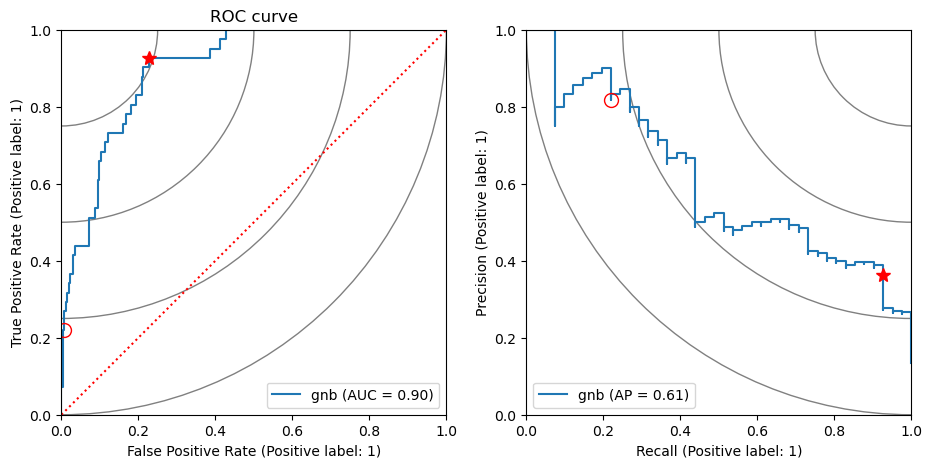

In [16]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1], pos_label = None)
#######################################################
pos = 5# зададим порог (2) (21, 61)
point = find_nearest(thresholds,0.5) # найдем позицию порога вероятности 0.5 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! звездочка
#######################################################
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(11, 5))

RocCurveDisplay.from_estimator(gnb, X_test, y_test, name = 'gnb', ax=ax1)
ax1.set_title("ROC curve")
ax1.plot([0,1],[0,1], color="r", ls=":")
ax1.plot(fpr[point],tpr[point], '*', markersize=10, color="r")
ax1.plot(fpr[pos],tpr[pos], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((0, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((0, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((0, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((0, 1), 1, color='gray',fill=False)
ax1.add_patch(circle0)
ax1.add_patch(circle1)
ax1.add_patch(circle2)
ax1.add_patch(circle3)
ax1.set_xlim((0, 1))
ax1.set_ylim((0, 1))

precision, recall, thresholds_pr = precision_recall_curve(y_test, gnb.predict_proba(X_test)[:,1], pos_label = None)
PrecisionRecallDisplay.from_estimator(gnb, X_test, y_test, name = 'gnb', ax=ax2)
point_pr = find_nearest(thresholds_pr,0.5)  # найдем позицию порога вероятности 0.5
pos_pr = find_nearest(thresholds_pr,thresholds[pos]) # найдем позицию порога для thresholds в позиции pos

ax2.plot(recall[point_pr],precision[point_pr], '*', markersize=10, color="r")
ax2.plot(recall[pos_pr],precision[pos_pr], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((1, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((1, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((1, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((1, 1), 1, color='gray',fill=False)
ax2.add_patch(circle0)
ax2.add_patch(circle1)
ax2.add_patch(circle2)
ax2.add_patch(circle3)
ax2.set_xlim((0, 1))
ax2.set_ylim((0, 1))

print( 'позиция порога 0.5 - ', point)
print( 'в позиции', pos, 'для ROC')
print( f'fpr:     {fpr[pos]:.3f}',       f' tpr:        {tpr[pos]:.3f}',          f' thresholds:,{thresholds[pos]:.3f}')
print( f'recall:  {recall[pos_pr]:.3f}', f' precision:, {precision[pos_pr]:.3f}', f' thresholds:,{thresholds[pos]:.3f}')


In [17]:
gnb = make_pipeline(MinMaxScaler(), LogisticRegression(penalty='l1', solver='saga', class_weight='balanced', max_iter=8000))
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       264
           1       0.37      0.90      0.52        41

    accuracy                           0.78       305
   macro avg       0.68      0.83      0.69       305
weighted avg       0.90      0.78      0.81       305



In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

threshold = 0.9

gnb = make_pipeline(MinMaxScaler(), 
                    LogisticRegression(penalty='l1', solver='saga', 
                                       class_weight='balanced', max_iter=8000))
gnb.fit(X_train, y_train)

y_probs = gnb.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

y_pred = (y_probs >= threshold).astype(int)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94       264
           1       0.88      0.17      0.29        41

    accuracy                           0.89       305
   macro avg       0.88      0.58      0.61       305
weighted avg       0.88      0.89      0.85       305



In [19]:
precision_scores = []
threshold = 0.9

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=i)

    gnb = make_pipeline(MinMaxScaler(), LogisticRegression(penalty='l1', solver='saga', class_weight='balanced', max_iter=8000))
    gnb.fit(X_train, y_train)
    
    y_probs = gnb.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса
    y_pred = (y_probs >= threshold).astype(int)
    
    precision = precision_score(y_test, y_pred, pos_label=1)
    precision_scores.append(precision)


average_precision = sum(precision_scores) / len(precision_scores)

print(f"Средний precision для класса 1: {average_precision:.4f}")


Средний precision для класса 1: 0.5919


In [20]:
# Лучшие параметры: {'clf__class_weight': 'balanced', 'clf__max_iter': 6000, 'clf__penalty': 'l2', 'clf__random_state': 42, 'clf__solver': 'liblinear', 'preprocessing': RobustScaler()}

In [21]:
precision_scores = []
threshold = 0.914

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=i)

    gnb = make_pipeline(RobustScaler(), LogisticRegression(penalty='l2', solver='liblinear', class_weight='balanced', max_iter=8000))
    gnb.fit(X_train, y_train)
    
    y_probs = gnb.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса
    y_pred = (y_probs >= threshold).astype(int)
    
    precision = precision_score(y_test, y_pred, pos_label=1)
    precision_scores.append(precision)


average_precision = sum(precision_scores) / len(precision_scores)

print(f"Средний precision для класса 1: {average_precision:.4f}")

Средний precision для класса 1: 0.6299


**конечный выбор упал на эту модель тк в среднем дает лучшую метрику, предыдущая модель менее устойчива**